In [60]:
import File_for_accesing_src
from Standard_parameters import *
from Vicsek_hooke import *
import numpy as np
import matplotlib.pyplot as plt
from Quiver import *
from Analysis import *
from functions import *
from scipy.optimize import curve_fit 

In [62]:
#Some trial functions

def D_gaussian(alpha,R,alpha_0,sigma,H):
    return R*(1+H*np.exp(-(alpha-alpha_0)**2/(2*sigma**2)) )

def D_2(alpha,R,alpha_0,sigma,H):
           return R*(1+H*np.exp(-(alpha-alpha_0)**4/(2*sigma**4)) )




In [63]:
#Now the data for certain orbits will be extracted
pos=np.load( "Data/Standard_simulation_pos.npy")
theta=np.load( "Data/Standard_simulation_theta.npy")

#Extracting the indexes from cluster and removing rotation

#First we need to find the indexes beloning to the cluster furter above 
indexes_in_cluster=return_partilces_from_box_indexes(pos[-1],23,28,5,10.5)
#Now finding the blue center
blue_indexes,red_indexes=filter_out_blue_and_red_indexes(indexes_in_cluster,N/2)
blue_center=find_center(pos,blue_indexes)

pos_c,theta_c,colors=take_away_rotation(pos,theta,indexes_in_cluster,blue_center,N/2)


36.0

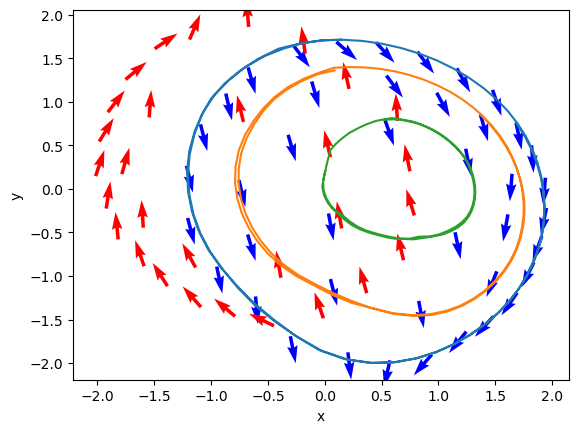

In [64]:
#Taking a brief look at the orbits 
%matplotlib inline

i=-1
plt.quiver(pos_c[i][:,0],pos_c[i][:,1],np.cos(theta_c[i]),np.sin(theta_c[i]),color=colors  )

cut_off=900

#Outer orbit
plt.plot(pos_c.transpose((1,2,0))[0][0][cut_off:],pos_c.transpose((1,2,0))[0][1][cut_off:])
#Middle orbit
plt.plot(pos_c.transpose((1,2,0))[2][0][cut_off:],pos_c.transpose((1,2,0))[2][1][cut_off:])
#Inner orbit
plt.plot(pos_c.transpose((1,2,0))[5][0][cut_off:],pos_c.transpose((1,2,0))[5][1][cut_off:])
plt.xlabel('x')
plt.ylabel('y')


len(pos_c[0])/2

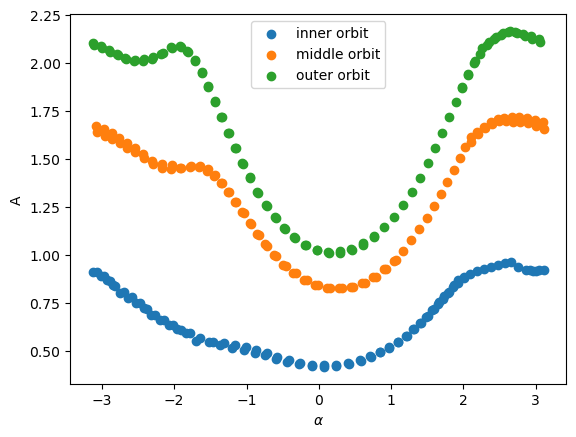

In [70]:
#Visually judging where the center is 
#center=np.array( [0.7,0.10])



#Ro=np.array([[np.cos(-0.5),-np.sin(-0.5)],[np.sin(-0.5),-np.cos(-0.5)]])
#center=np.dot(Ro,  center)
#center=np.array([0,0])
#number_of_blue=0
#for j in range(len(pos_c[-1]) ):
 #   if colors[j]=='blue':
  #       number_of_blue+=1
   #      center=pos_c[-1][j]+center
#center=center/ number_of_blue

x5=pos_c.transpose((1,2,0))[5][0][cut_off:]-center[0]
y5=pos_c.transpose((1,2,0))[5][1][cut_off:]-center[1]



deviation_from_center5=np.sqrt(x5**2+y5**2)
alphas5=np.angle(x5+y5*1j)

plt.scatter(alphas5,deviation_from_center5,label='inner orbit')




x2=pos_c.transpose((1,2,0))[2][0][cut_off:]-center[0]
y2=pos_c.transpose((1,2,0))[2][1][cut_off:]-center[1]

#
deviation_from_center2=np.sqrt(x2**2+y2**2)
alphas2=np.angle(x2+y2*1j)

plt.scatter(alphas2,deviation_from_center2,label='middle orbit')




x0=pos_c.transpose((1,2,0))[0][0][cut_off:]-center[0]
y0=pos_c.transpose((1,2,0))[0][1][cut_off:]-center[1]

#
deviation_from_center0=np.sqrt(x0**2+y0**2)
alphas0=np.angle(x0+y0*1j)

plt.scatter(alphas0,deviation_from_center0,label='outer orbit')








plt.xlabel(r'$\alpha$')
plt.ylabel('A')
plt.legend()



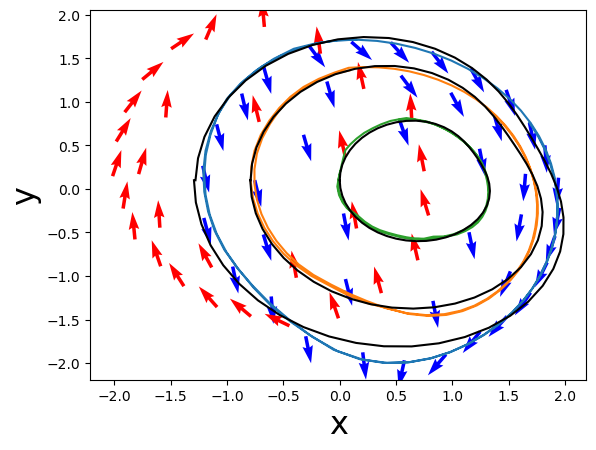

In [58]:
#Now fitting orbit beginning with gaussian
gaussian_0,cov_gaussian_0=curve_fit(D_gaussian,alphas0,deviation_from_center0)
gaussian_2,cov_gaussian_2=curve_fit(D_gaussian,alphas2,deviation_from_center2)
gaussian_5,cov_gaussian_5=curve_fit(D_gaussian,alphas5,deviation_from_center5)


#Angles to plot with
t=np.linspace(-np.pi,np.pi)

#Taking a brief look at the orbits 
%matplotlib inline

i=-1
plt.quiver(pos_c[i][:,0],pos_c[i][:,1],np.cos(theta_c[i]),np.sin(theta_c[i]),color=colors  )

cut_off=900

#Outer orbit
plt.plot(pos_c.transpose((1,2,0))[0][0][cut_off:],pos_c.transpose((1,2,0))[0][1][cut_off:])
#Middle orbit
plt.plot(pos_c.transpose((1,2,0))[2][0][cut_off:],pos_c.transpose((1,2,0))[2][1][cut_off:])
#Inner orbit
plt.plot(pos_c.transpose((1,2,0))[5][0][cut_off:],pos_c.transpose((1,2,0))[5][1][cut_off:])


#The outer curve
R0=D_gaussian(t,gaussian_0[0],gaussian_0[1],gaussian_0[2],gaussian_0[3])
plt.plot(R0*np.cos(t)+center[0],R0*np.sin(t)+center[1],color='black')




#The middle curve
R2=D_gaussian(t,gaussian_2[0],gaussian_2[1],gaussian_2[2],gaussian_2[3])
plt.plot(R2*np.cos(t)+center[0],R2*np.sin(t)+center[1],color='black')



#The inner curve
R5=D_gaussian(t,gaussian_5[0],gaussian_5[1],gaussian_5[2],gaussian_5[3])
plt.plot(R5*np.cos(t)+center[0],R5*np.sin(t)+center[1],color='black')



plt.xlabel('x',fontsize=23)
plt.ylabel('y',fontsize=23)

plt.savefig("Plots/standard_parameters/Orbit_fitting_with_gaussian_dent.pdf")

In [56]:
#Now printing the paramterers
print("outer orbit", gaussian_0)
print("Middle orbit", gaussian_2)
print("inner orbit", gaussian_5)

outer orbit [ 1.99447852  0.4324357   0.94090323 -0.44171621]
Middle orbit [ 1.49409145  0.48293676  0.8029319  -0.36940144]
inner orbit [ 0.70027647  0.49317616  0.55124239 -0.17179522]


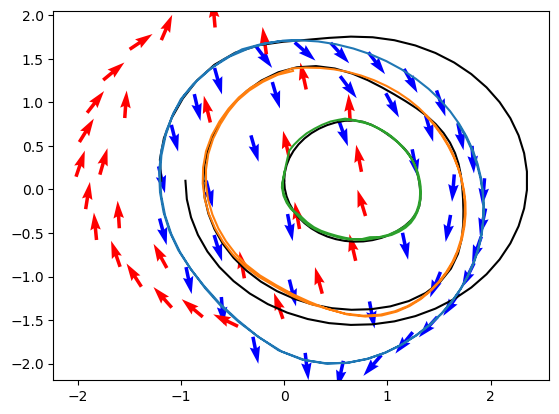

In [33]:
#Now the other function 
#Now fitting orbit beginning with gaussian
D_2_parameters_0,cov_D_2_0=curve_fit(D_2,alphas0,deviation_from_center0)
D_2_parameters_2,cov_D_2_2=curve_fit(D_2,alphas2,deviation_from_center2)
D_2_parameters_5,cov_D_2_5=curve_fit(D_2,alphas5,deviation_from_center5)



#The outer curve
R0=D_2(t,D_2_parameters_0[0],D_2_parameters_0[1],D_2_parameters_0[2],D_2_parameters_0[3])
plt.plot(R0*np.cos(t)+center[0],R0*np.sin(t)+center[1],color='black')

#The middle curve
R2=D_2(t,D_2_parameters_2[0],D_2_parameters_2[1],D_2_parameters_2[2],D_2_parameters_2[3])
plt.plot(R2*np.cos(t)+center[0],R2*np.sin(t)+center[1],color='black')



#The inner curve
R5=D_2(t,D_2_parameters_5[0],D_2_parameters_5[1],D_2_parameters_5[2],D_2_parameters_5[3])
plt.plot(R5*np.cos(t)+center[0],R5*np.sin(t)+center[1],color='black')

#Outer orbit
plt.plot(pos_c.transpose((1,2,0))[0][0][cut_off:],pos_c.transpose((1,2,0))[0][1][cut_off:])
#Middle orbit
plt.plot(pos_c.transpose((1,2,0))[2][0][cut_off:],pos_c.transpose((1,2,0))[2][1][cut_off:])
#Inner orbit
plt.plot(pos_c.transpose((1,2,0))[5][0][cut_off:],pos_c.transpose((1,2,0))[5][1][cut_off:])


i=-1
plt.quiver(pos_c[i][:,0],pos_c[i][:,1],np.cos(theta_c[i]),np.sin(theta_c[i]),color=colors  )

cut_off=900


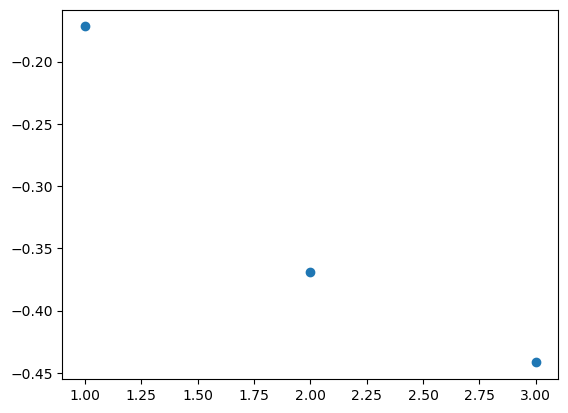

In [51]:
plt.scatter([1,2,3], [gaussian_5[-1],gaussian_2[-1],gaussian_0[-1] ])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


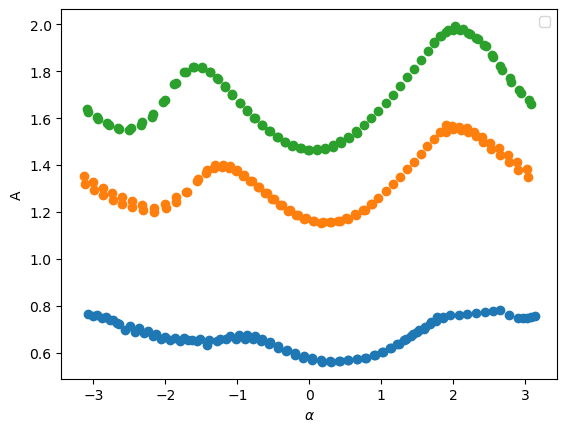

In [59]:
#Now using different center for each orbit the center will be the average positio
#Visually judging where the center is 
center=np.array( [0.7,0.10])

x5_c=pos_c.transpose((1,2,0))[5][0][cut_off:]-np.average(pos_c.transpose((1,2,0))[5][0][cut_off:])
y5_c=pos_c.transpose((1,2,0))[5][1][cut_off:]-np.average(pos_c.transpose((1,2,0))[5][1][cut_off:])



deviation_from_center5_c=np.sqrt(x5_c**2+y5_c**2)
alphas5_c=np.angle(x5_c+y5_c*1j)

plt.scatter(alphas5_c,deviation_from_center5_c)




x2_c=pos_c.transpose((1,2,0))[2][0][cut_off:]-np.average(pos_c.transpose((1,2,0))[2][0][cut_off:])
y2_c=pos_c.transpose((1,2,0))[2][1][cut_off:]-np.average(pos_c.transpose((1,2,0))[2][1][cut_off:])

#
deviation_from_center2_c=np.sqrt(x2_c**2+y2_c**2)
alphas2_c=np.angle(x2_c+y2_c*1j)

plt.scatter(alphas2_c,deviation_from_center2_c)




x0_c=pos_c.transpose((1,2,0))[0][0][cut_off:]-np.average(pos_c.transpose((1,2,0))[0][0][cut_off:])
y0_c=pos_c.transpose((1,2,0))[0][1][cut_off:]-np.average(pos_c.transpose((1,2,0))[0][1][cut_off:])

#
deviation_from_center0_c=np.sqrt(x0_c**2+y0_c**2)
alphas0_c=np.angle(x0_c+y0_c*1j)

plt.scatter(alphas0_c,deviation_from_center0_c)








plt.xlabel(r'$\alpha$')
plt.ylabel('A')
plt.legend()



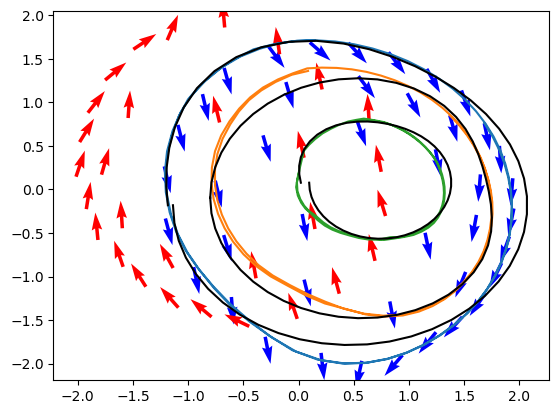

In [47]:
#Now fitting orbit beginning with gaussian
gaussian_0_c,cov_gaussian_0_c=curve_fit(D_gaussian,alphas0_c,deviation_from_center0_c)
gaussian_2_c,cov_gaussian_2_c=curve_fit(D_gaussian,alphas2_c,deviation_from_center2_c)
gaussian_5_c,cov_gaussian_5_c=curve_fit(D_gaussian,alphas5_c,deviation_from_center5_c)


plt.quiver(pos_c[i][:,0],pos_c[i][:,1],np.cos(theta_c[i]),np.sin(theta_c[i]),color=colors  )

cut_off=900

#Outer orbit
plt.plot(pos_c.transpose((1,2,0))[0][0][cut_off:],pos_c.transpose((1,2,0))[0][1][cut_off:])
#Middle orbit
plt.plot(pos_c.transpose((1,2,0))[2][0][cut_off:],pos_c.transpose((1,2,0))[2][1][cut_off:])
#Inner orbit
plt.plot(pos_c.transpose((1,2,0))[5][0][cut_off:],pos_c.transpose((1,2,0))[5][1][cut_off:])


#The outer curve
center0=np.average(pos_c.transpose((1,0,2))[0][cut_off:],axis=0)
R0=D_gaussian(t,gaussian_0_c[0],gaussian_0_c[1],gaussian_0_c[2],gaussian_0_c[3])
plt.plot(R0*np.cos(t)+center0[0],R0*np.sin(t)+center0[1],color='black')




#The middle curve
center2=np.average(pos_c.transpose((1,0,2))[2][cut_off:],axis=0)
R2=D_gaussian(t,gaussian_2_c[0],gaussian_2_c[1],gaussian_2_c[2],gaussian_2_c[3])
plt.plot(R2*np.cos(t)+center2[0],R2*np.sin(t)+center2[1],color='black')


#The inner curve
center5=np.average(pos_c.transpose((1,0,2))[5][cut_off:],axis=0)
R5=D_gaussian(t,gaussian_5_c[0],gaussian_5_c[1],gaussian_5_c[2],gaussian_5_c[3])
plt.plot(R5*np.cos(t)+center5[0],R5*np.sin(t)+center5[1],color='black')



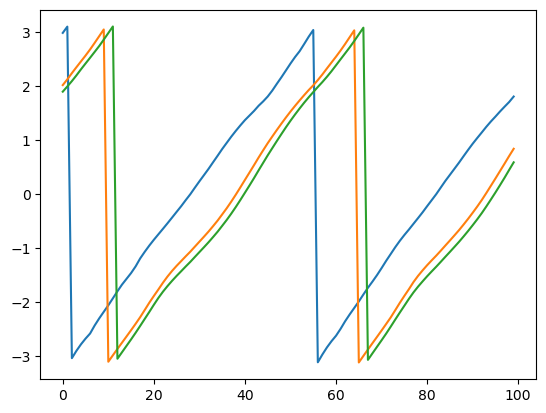

In [47]:
plt.plot(alphas5)
plt.plot(alphas2)
plt.plot(alphas0)

In [48]:
cut_off

900

In [50]:
q=[1,2,3,4,5,6]

In [51]:
q[1:]

[2, 3, 4, 5, 6]